In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Alcohol_Sales.csv',parse_dates=['DATE'])


In [3]:
df

,DATE,S4248SM144NCEN
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221
...,...,...
320,2018-09-01,12396
321,2018-10-01,13914
322,2018-11-01,14174
323,2018-12-01,15504


In [4]:
df.dtypes

DATE              datetime64[ns]
S4248SM144NCEN             int64
dtype: object

In [5]:
df.isnull().sum()

DATE              0
S4248SM144NCEN    0
dtype: int64

In [6]:
df=df.groupby('DATE').sum()
df=df.resample(rule='M').sum()


In [7]:
df.dtypes

S4248SM144NCEN    int64
dtype: object

In [8]:
df.head(10)
df.shape

(325, 1)

<AxesSubplot:xlabel='DATE'>

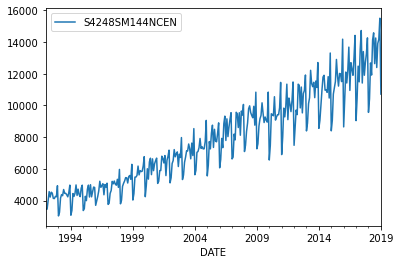

In [9]:
df.plot()

In [10]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose   

C:\Users\e17ks\AppData\Local\Temp/ipykernel_32172/2424610360.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  seasonal_decompose(df,model='multiplicative',freq=1).plot()


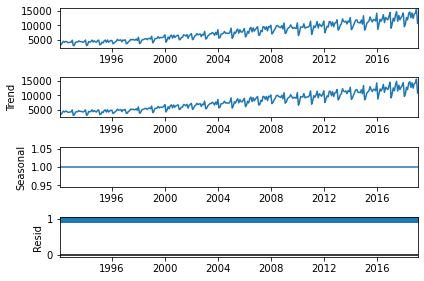

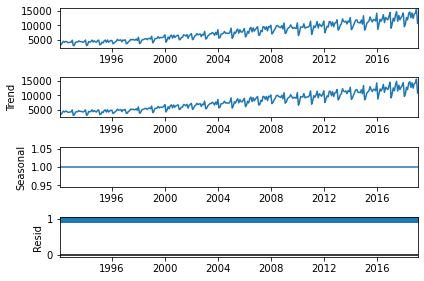

In [11]:
seasonal_decompose(df,model='multiplicative',freq=1).plot()

In [12]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [13]:
hwmodel=ExponentialSmoothing(df.S4248SM144NCEN,trend='add', seasonal='mul', seasonal_periods=4).fit()

C:\Users\e17ks\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\e17ks\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [14]:
test_pred=hwmodel.forecast(5)
test_pred

C:\Users\e17ks\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


2019-02-28    13290.846559
2019-03-31    13469.361720
2019-04-30    14438.517283
2019-05-31    12742.018411
2019-06-30    13489.891734
Freq: M, dtype: float64

<AxesSubplot:xlabel='DATE'>

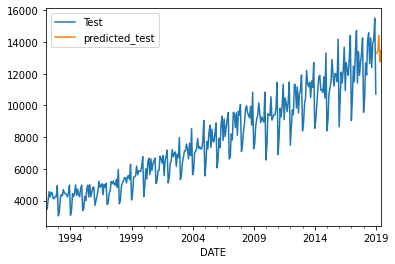

In [15]:
# train['sales'].plot(legend=True, label='Train', figsize=(10,6))
df['S4248SM144NCEN'].plot(legend=True, label='Test')

test_pred.plot(legend=True, label='predicted_test')